# Delivery Solutions #

## why are there bad deliveries and how can we fix them? ##

Are there bad sellers?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df.head()

,order_id,seller_id,seller_state,seller_city,order_status,purchase_date,approved_date,carrier_date,customer_date,estimate_date,shipping_limit_date,freight_value,product_weight_g,price,distance,category,delivery_time,delivery_performance,late
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,SP,volta redonda,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,13.29,650.0,58.90,301.229205,cool_stuff,7.0,-8.0,0
1,0036757472ece3dde52fd4bfd929c90e,7c67e1448b00f6e969d365cea6b010ab,SP,itaquaquecetuba,delivered,2018-07-19 14:58:59,2018-07-19 15:10:11,2018-08-07 07:45:00,2018-08-09 14:33:40,2018-08-20 00:00:00,2018-08-08 15:10:11,66.04,15475.0,136.99,307.891649,office_furniture,20.0,-10.0,0
2,0036887767dea4bd43b1a88cd0d9477a,46dc3b2cc0980fb8ec44634e21d2718e,RJ,rio de janeiro,delivered,2017-10-13 00:04:49,2017-10-14 00:07:30,2017-10-17 12:56:45,2017-10-23 19:09:12,2017-11-01 00:00:00,2017-10-19 01:07:30,23.64,8100.0,399.99,341.002270,toys,10.0,-8.0,0
3,00378c6c981f234634c0b9d6128df6dd,218d46b86c1881d022bce9c68a7d4b15,SP,ribeirao preto,delivered,2018-02-02 19:39:46,2018-02-02 19:50:27,2018-02-05 18:06:49,2018-02-26 21:36:00,2018-02-26 00:00:00,2018-02-08 19:50:27,11.85,183.0,41.00,310.710734,sports_leisure,24.0,0.0,1
4,003822434f91204da0a51fe4cf2aba18,c54679b132454625907c773d273d4126,SP,guaruja,delivered,2018-06-13 14:10:54,2018-06-15 02:37:21,2018-06-15 14:48:00,2018-06-19 13:34:35,2018-07-20 00:00:00,2018-06-21 02:30:28,18.58,250.0,69.00,331.169932,perfumery,5.0,-30.0,0


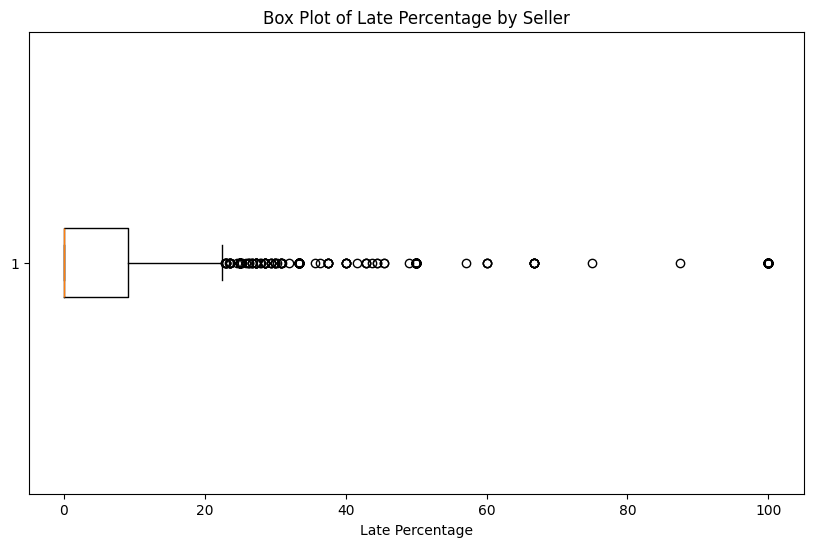

In [11]:
# seller level data
# get seller performance column --> percentage with late =1
seller_performance = df.groupby('seller_id').agg(late_percentage=('late', lambda x: (x.sum() / len(x)) * 100)).reset_index()
plt.figure(figsize=(10, 6))
plt.boxplot(seller_performance['late_percentage'], vert=False)
plt.title('Box Plot of Late Percentage by Seller')
plt.xlabel('Late Percentage')
plt.show()

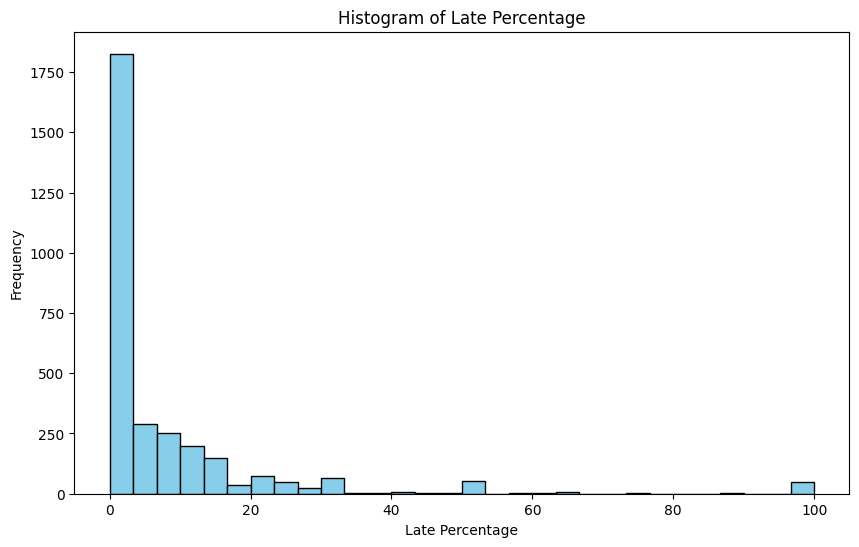

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(seller_performance['late_percentage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Late Percentage')
plt.xlabel('Late Percentage')
plt.ylabel('Frequency')
plt.show()

In [12]:
percentile_75 = seller_performance['late_percentage'].quantile(0.75)
print(f"75th Percentile of Late Percentage: {percentile_75}")

75th Percentile of Late Percentage: 9.090909090909092


In [13]:
# Filter sellers with late percentage above 10
sellers_above_10 = seller_performance[seller_performance['late_percentage'] > 10]['seller_id']

# Count late orders from these sellers
late_orders_above_10 = df[df['seller_id'].isin(sellers_above_10) & (df['late'] == 1)].shape[0]

# Count total late orders
total_late_orders = df[df['late'] == 1].shape[0]

print(f"Count of late orders from sellers with late percentage above 10: {late_orders_above_10}")
print(f"Total count of late orders: {total_late_orders}")

Count of late orders from sellers with late percentage above 10: 4229
Total count of late orders: 8715


In [17]:
# about half of late orders come from the top 25 percent worst performing sellers.
# Investigate sellers with late percentage above 10
sellers_above_10_data = df[df['seller_id'].isin(sellers_above_10)]

# Group by seller_id and calculate average price, average distance, and average freight value
seller_stats = sellers_above_10_data.groupby('seller_id').agg(
    avg_price=('price', 'mean'),
    avg_distance=('distance', 'mean'),
    avg_freight_value=('freight_value', 'mean'),
    avg_weight=('product_weight_g', 'mean')
).reset_index()

print(seller_stats.describe())
# Investigate sellers with late percentage 10 or below
sellers_below_10_data = df[~df['seller_id'].isin(sellers_above_10)]

# Group by seller_id and calculate average price, average distance, and average freight value
seller_stats_below_10 = sellers_below_10_data.groupby('seller_id').agg(
    avg_price=('price', 'mean'),
    avg_distance=('distance', 'mean'),
    avg_freight_value=('freight_value', 'mean'),
    avg_weight=('product_weight_g', 'mean')
).reset_index()

print(seller_stats_below_10.describe())

         avg_price  avg_distance  avg_freight_value    avg_weight
count   703.000000    701.000000         703.000000    703.000000
mean    192.317179    601.934508          24.127704   3033.441840
std     365.779336    335.861453          17.914982   4301.403208
min      10.900000     12.159315           7.390000    103.385027
25%      59.095572    395.263852          15.100875    526.969697
50%     102.289474    553.705541          18.560000   1198.717949
75%     194.528947    744.387762          25.704464   3478.421569
max    6729.000000   2495.434210         193.210000  30000.000000
         avg_price  avg_distance  avg_freight_value    avg_weight
count  2392.000000   2387.000000        2392.000000   2392.000000
mean    171.625089    615.871652          23.160403   2388.145283
std     308.076072    409.657576          19.251588   4111.449341
min       3.500000      1.135905           1.200000     50.000000
25%      50.491402    366.744976          14.605105    414.482143
50%      9

The profiles for the bad performers and good performers are remarkably similar. We should check if any locations are biased on one group compared to the other. Some locations may have worse carrier options. If they are similar, a good recommendation would be to have them change carriers.
The weight is higher in the late group, but the freight values are similar. Perhaps it is worth increasing the freight price to ensure the delivery is on time.

In [16]:
# Calculate state percentages for sellers above 10%
states_above_10 = sellers_above_10_data['seller_state'].value_counts(normalize=True) * 100

# Calculate state percentages for sellers below 10%
states_below_10 = sellers_below_10_data['seller_state'].value_counts(normalize=True) * 100

# Display the results
print("State Percentages for Sellers Above 10%:")
print(states_above_10)

print("\nState Percentages for Sellers Below 10%:")
print(states_below_10)

# Find the difference in state percentages between the two groups
state_difference = states_above_10.subtract(states_below_10, fill_value=0)

# Display the results
print("\nDifference in State Percentages (Above 10% - Below 10%):")
print(state_difference)

State Percentages for Sellers Above 10%:
seller_state
SP    81.095871
PR     6.401936
MG     3.672782
RJ     3.055390
SC     2.308205
MA     1.420704
DF     0.561266
RS     0.473568
BA     0.368331
ES     0.164872
GO     0.115761
CE     0.112253
MS     0.066650
PB     0.056127
RN     0.056127
PE     0.031571
PA     0.028063
AM     0.010524
Name: proportion, dtype: float64

State Percentages for Sellers Below 10%:
seller_state
SP    68.008034
MG     9.246164
PR     8.136149
RJ     4.690824
SC     4.060944
RS     2.452967
DF     0.878267
BA     0.639388
GO     0.578777
PE     0.521731
ES     0.386247
MT     0.172326
CE     0.073684
RN     0.047538
MS     0.036842
PB     0.026146
RO     0.016638
PI     0.014261
SE     0.011885
AC     0.001188
Name: proportion, dtype: float64

Difference in State Percentages (Above 10% - Below 10%):
seller_state
AC    -0.001188
AM     0.010524
BA    -0.271057
CE     0.038569
DF    -0.317001
ES    -0.221375
GO    -0.463016
MA     1.420704
MG    -5.573382
MS

There is a location bias towards Sao Paolo when they are late. Perhaps carrier options are worse there

/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_9398/3154639574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers_above_10_data['shipping_limit_date'] = pd.to_datetime(sellers_above_10_data['shipping_limit_date'])
/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_9398/3154639574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers_above_10_data['carrier_date'] = pd.to_datetime(sellers_above_10_data['carrier_date'])
/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykern

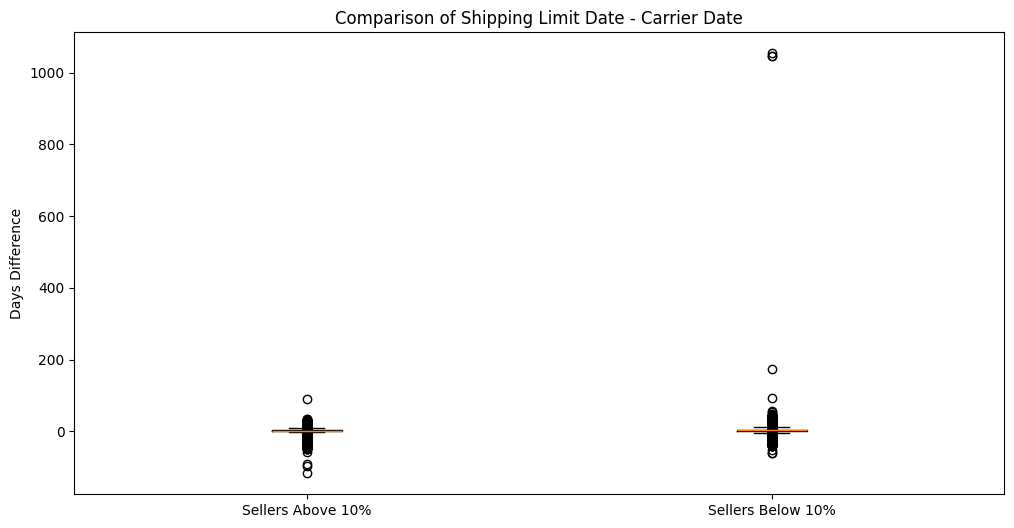

In [9]:
# Convert dates to datetime format
sellers_above_10_data['shipping_limit_date'] = pd.to_datetime(sellers_above_10_data['shipping_limit_date'])
sellers_above_10_data['carrier_date'] = pd.to_datetime(sellers_above_10_data['carrier_date'])

sellers_below_10_data['shipping_limit_date'] = pd.to_datetime(sellers_below_10_data['shipping_limit_date'])
sellers_below_10_data['carrier_date'] = pd.to_datetime(sellers_below_10_data['carrier_date'])

# Calculate the difference in days
sellers_above_10_data['shipping_vs_carrier'] = (sellers_above_10_data['shipping_limit_date'] - sellers_above_10_data['carrier_date']).dt.days
sellers_below_10_data['shipping_vs_carrier'] = (sellers_below_10_data['shipping_limit_date'] - sellers_below_10_data['carrier_date']).dt.days

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.boxplot([sellers_above_10_data['shipping_vs_carrier'].dropna(), sellers_below_10_data['shipping_vs_carrier'].dropna()],
            labels=['Sellers Above 10%', 'Sellers Below 10%'])
plt.title('Comparison of Shipping Limit Date - Carrier Date')
plt.ylabel('Days Difference')
plt.show()

In [26]:
# Convert purchase_date to datetime if not already
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['estimate_date'] = pd.to_datetime(df['estimate_date'])
df['estimate_length'] = df['estimate_date'] - df['purchase_date']

# Group by year and month, and calculate the counts
monthly_counts = df.groupby(df['purchase_date'].dt.to_period('M')).size()

# Filter months with counts >= 50
valid_months = monthly_counts[monthly_counts >= 50].index

# Filter the dataframe to include only valid months
filtered_df = df[df['purchase_date'].dt.to_period('M').isin(valid_months)]

# Group by year and month, and calculate the monthly averages
monthly_averages = filtered_df.groupby(filtered_df['purchase_date'].dt.to_period('M')).agg(
    avg_weight=('product_weight_g', 'mean'),
    avg_distance=('distance', 'mean'),
    avg_price=('price', 'mean'),
    avg_delivery_performance=('delivery_performance', 'mean'),
    avg_freight_cost=('freight_value', 'mean'),
    avg_estimate_length= ('estimate_length', 'mean'),
    avg_delivery_time = ('delivery_time', 'mean'),
    avg_late = ('late', 'mean')
).reset_index()

# Convert the period to a datetime object for better handling
monthly_averages['purchase_date'] = monthly_averages['purchase_date'].dt.to_timestamp()

print(monthly_averages)

   purchase_date   avg_weight  avg_distance   avg_price  \
0     2016-10-01  2282.344353    660.396583  136.384738   
1     2017-01-01  2184.197065    630.191358  125.982063   
2     2017-02-01  2454.046643    648.153981  126.757058   
3     2017-03-01  2268.422422    646.252788  124.781433   
4     2017-04-01  2315.680986    674.589189  134.101054   
5     2017-05-01  2259.576402    629.380681  122.357626   
6     2017-06-01  2283.535475    580.422446  120.859224   
7     2017-07-01  2380.875360    610.179627  110.208338   
8     2017-08-01  2191.803586    628.060237  116.898509   
9     2017-09-01  2180.826744    648.421083  129.248953   
10    2017-10-01  2075.623262    632.459275  124.806357   
11    2017-11-01  2104.685401    605.751698  116.592195   
12    2017-12-01  2045.127457    586.025658  117.931860   
13    2018-01-01  2173.226121    596.325563  115.744440   
14    2018-02-01  1910.660975    614.199577  110.033721   
15    2018-03-01  2149.535475    596.755649  119.656011 

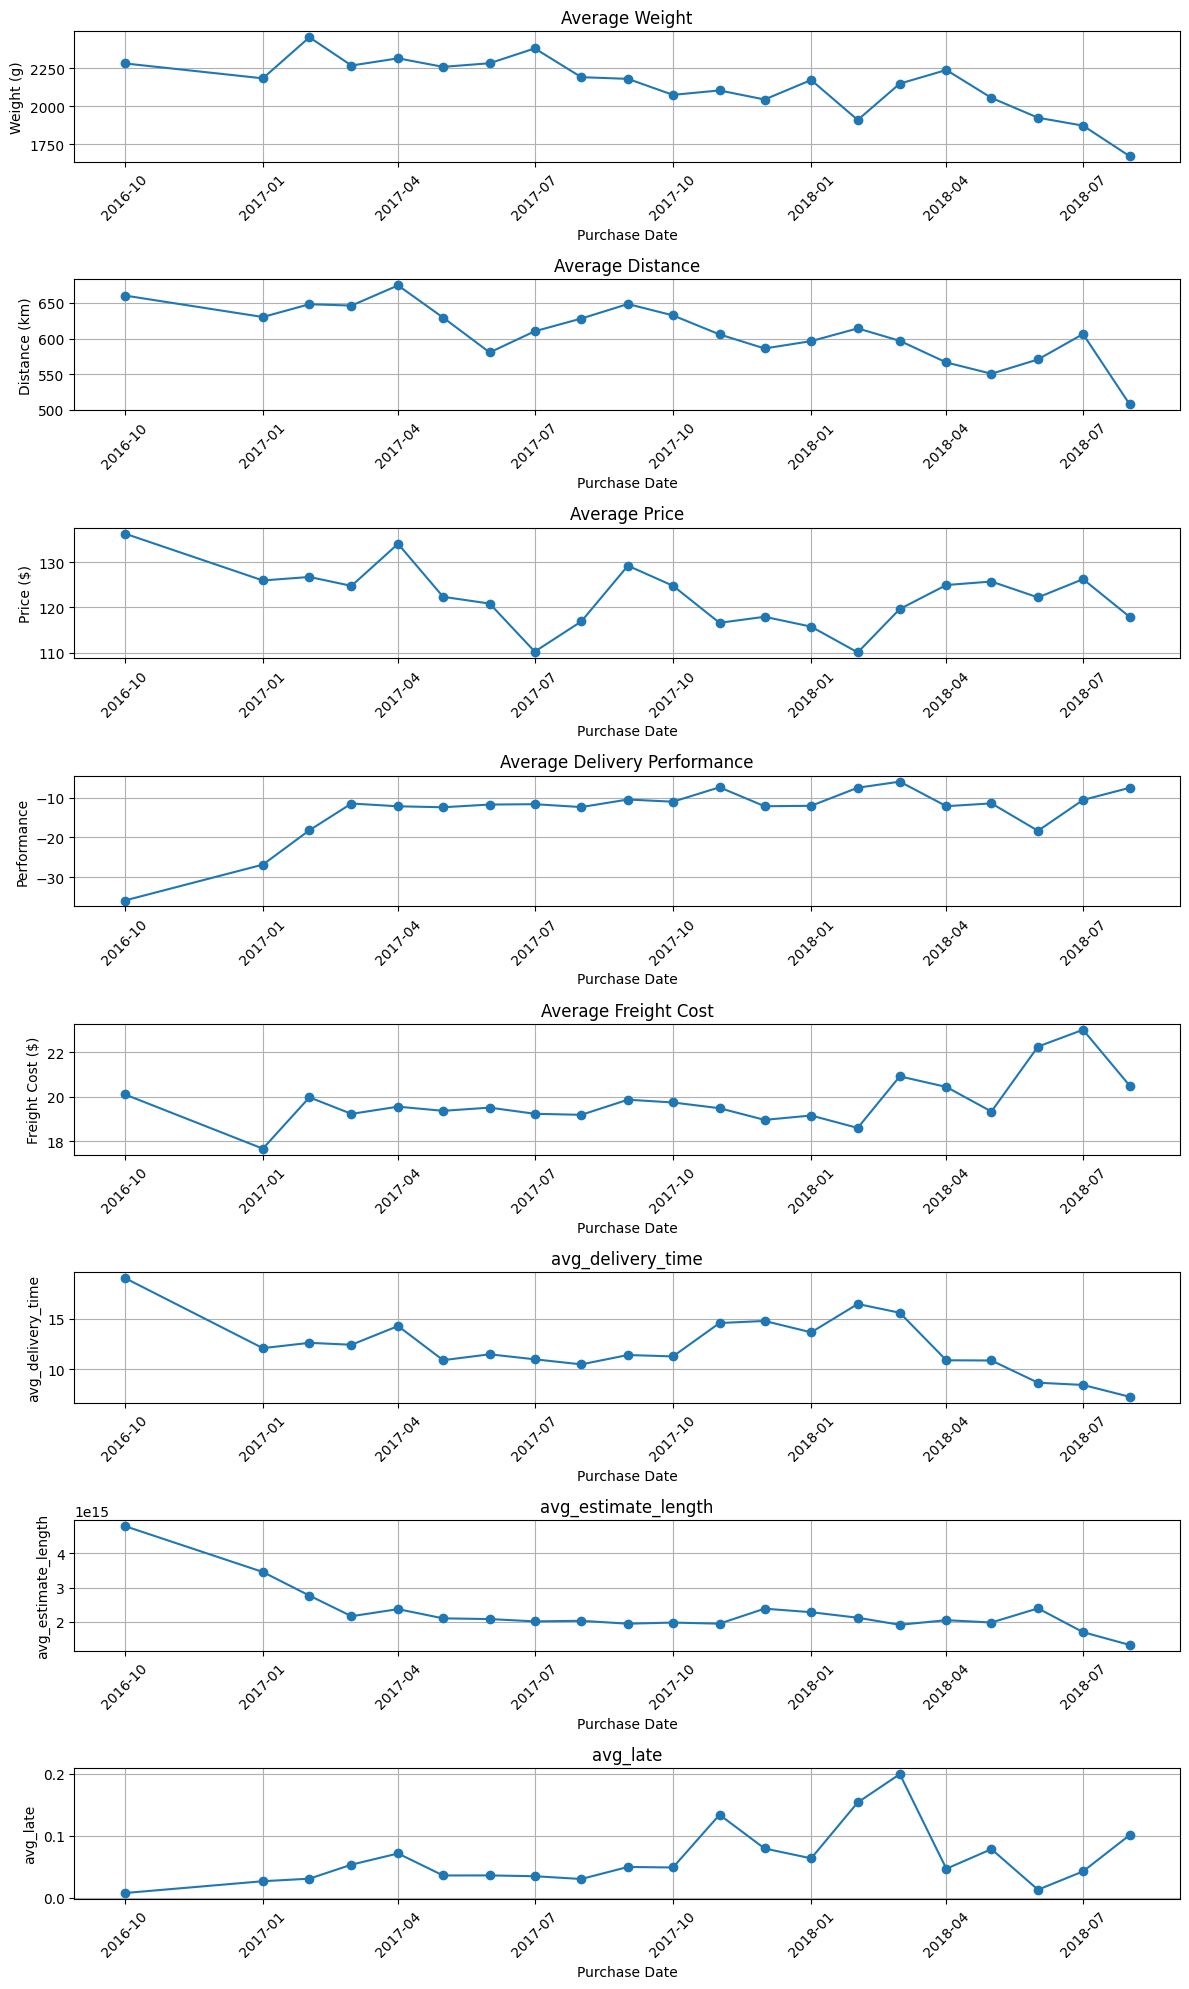

In [28]:
metrics = ['avg_weight', 'avg_distance', 'avg_price', 'avg_delivery_performance', 'avg_freight_cost', 'avg_delivery_time','avg_estimate_length', 'avg_late'] 
titles = ['Average Weight', 'Average Distance', 'Average Price', 'Average Delivery Performance', 'Average Freight Cost', 'avg_delivery_time','avg_estimate_length', 'avg_late']
y_labels = ['Weight (g)', 'Distance (km)', 'Price ($)', 'Performance', 'Freight Cost ($)', 'avg_delivery_time','avg_estimate_length', 'avg_late']

plt.figure(figsize=(12, 20))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i + 1)
    plt.plot(monthly_averages['purchase_date'], monthly_averages[metric], label=titles[i], marker='o')
    plt.title(titles[i])
    plt.xlabel('Purchase Date')
    plt.ylabel(y_labels[i])
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [29]:
# Select the metrics for correlation
metrics_data = monthly_averages[['avg_weight', 'avg_distance', 'avg_price', 'avg_delivery_performance', 
                                 'avg_freight_cost', 'avg_delivery_time', 'avg_estimate_length', 'avg_late']]

# Compute the correlation matrix
correlation_matrix = metrics_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                          avg_weight  avg_distance  avg_price  \
avg_weight                  1.000000      0.636807   0.273406   
avg_distance                0.636807      1.000000   0.442746   
avg_price                   0.273406      0.442746   1.000000   
avg_delivery_performance   -0.319221     -0.368899  -0.556702   
avg_freight_cost           -0.373898     -0.253848   0.220160   
avg_delivery_time           0.354749      0.486816   0.113592   
avg_estimate_length         0.402080      0.485822   0.511443   
avg_late                   -0.352096     -0.257307  -0.421474   

                          avg_delivery_performance  avg_freight_cost  \
avg_weight                               -0.319221         -0.373898   
avg_distance                             -0.368899         -0.253848   
avg_price                                -0.556702          0.220160   
avg_delivery_performance                  1.000000          0.095927   
avg_freight_cost                          0.095927    

In [32]:
percentages_by_delays = pd.read_csv('../data_csv/scores_by_time_days_late.csv')

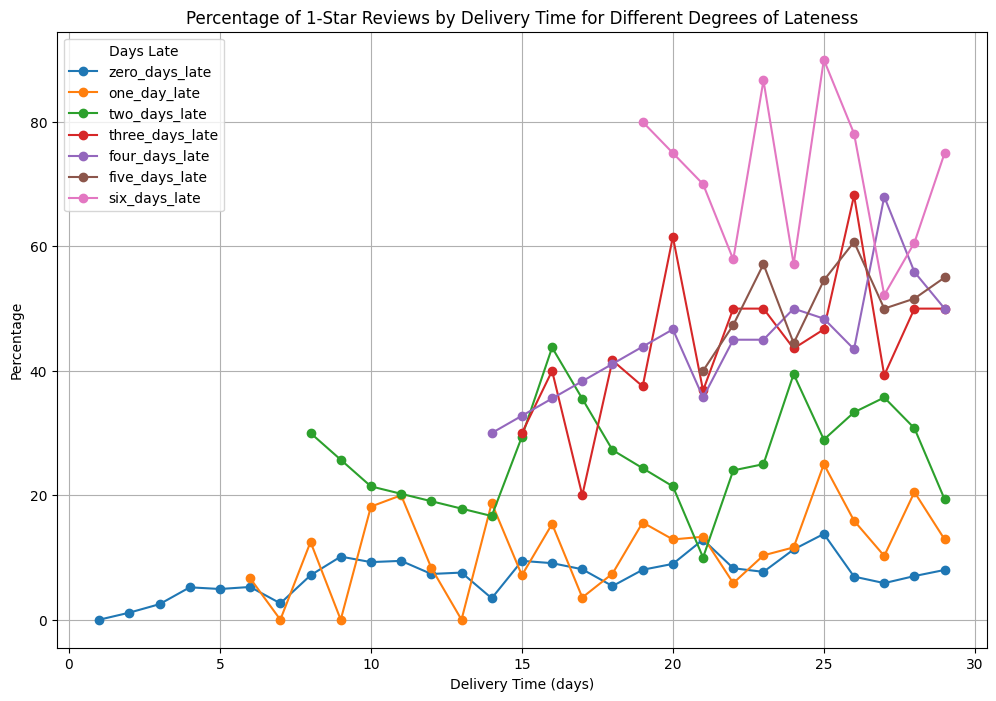

In [36]:
# Set the delivery_time column as the x-axis
x_axis = percentages_by_delays['delivery_time']

# Plot each percentage column as a line
plt.figure(figsize=(12, 8))
for column in ["zero_days_late", "one_day_late", "two_days_late", "three_days_late", "four_days_late", "five_days_late", "six_days_late"]:
    plt.plot(x_axis, percentages_by_delays[column].interpolate(), label=column, marker='o')  # Interpolate missing points to connect dots

# Add labels, title, and legend
plt.title('Percentage of 1-Star Reviews by Delivery Time for Different Degrees of Lateness')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Percentage')
plt.legend(title='Days Late')
plt.grid(True)
plt.show()

In [ ]:
freight_class = pd.read_csv('../data_csv/freight_class.csv')
import seaborn as sns

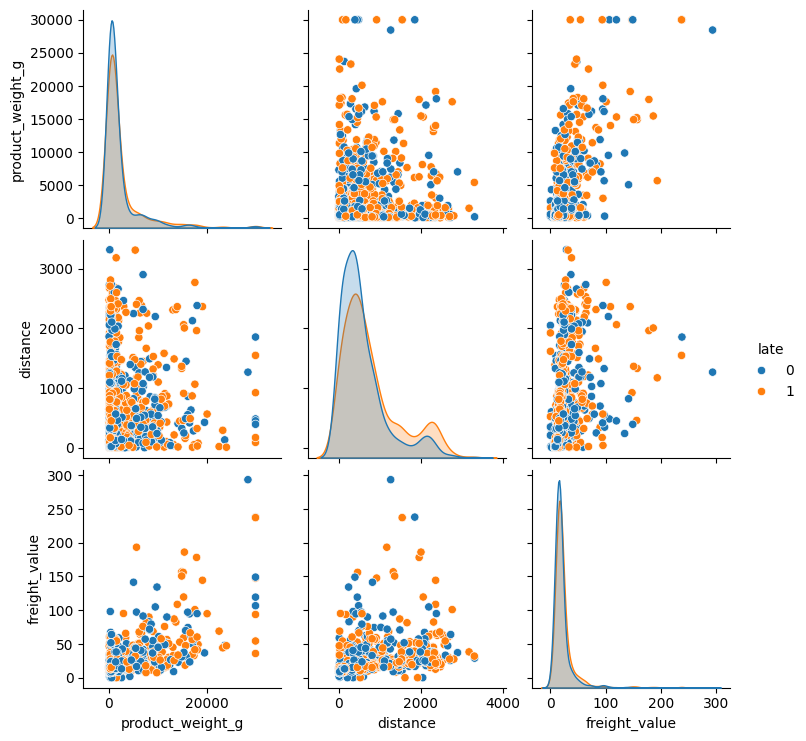

In [67]:
df_majority = freight_class[freight_class.late == 0]
df_minority = freight_class[freight_class.late == 1]
df_majority_undersampled = df_majority.sample(n=len(df_minority), replace=False, random_state=42)
df_undersampled = pd.concat([df_majority_undersampled, df_minority])
df_shuffled = df_undersampled.sample(frac=0.1).reset_index(drop=True)
sns.pairplot(df_shuffled, hue='late', diag_kind='kde', vars=['product_weight_g', 'distance', 'freight_value'])
plt.show()

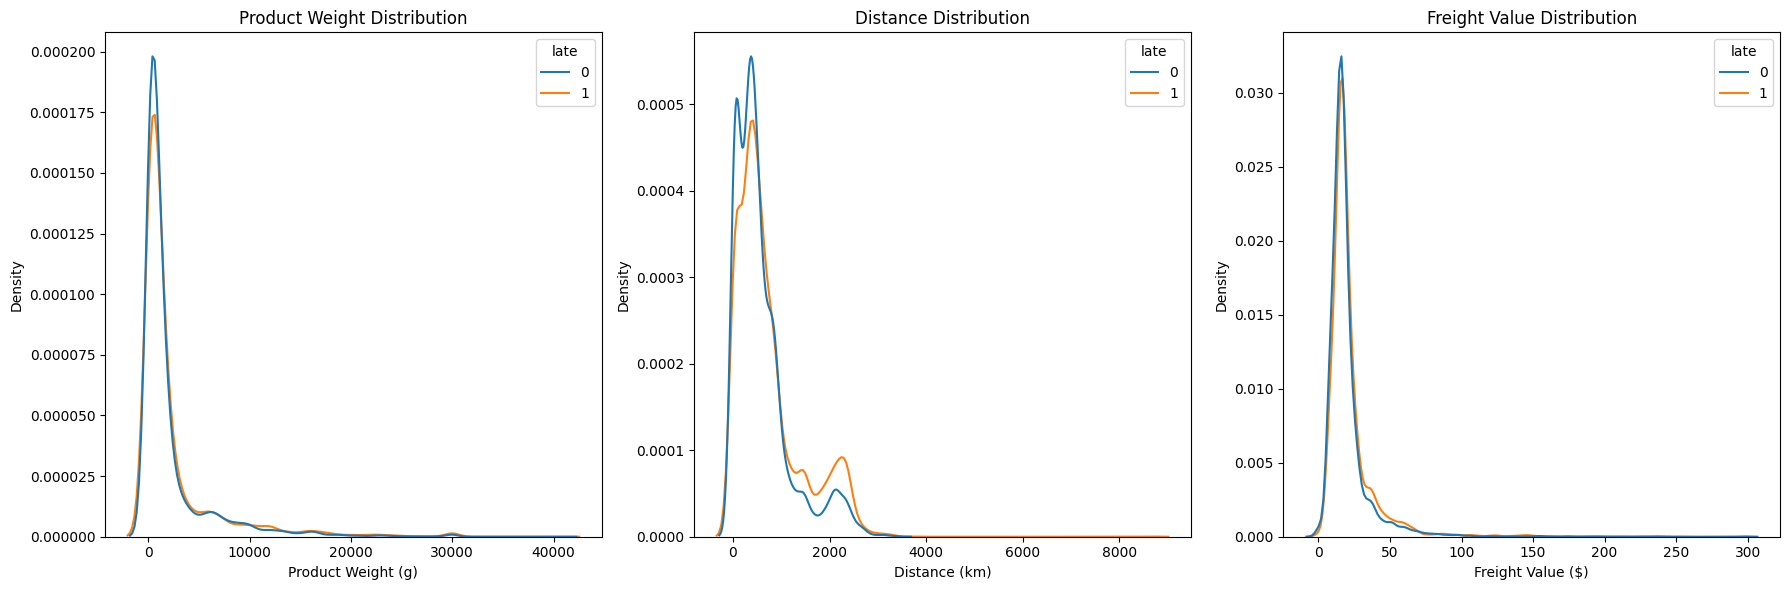

In [66]:
plt.figure(figsize=(18, 6))

# Plot for product_weight_g
plt.subplot(1, 3, 1)
sns.kdeplot(x='product_weight_g', hue='late', data=df_undersampled)
plt.title('Product Weight Distribution')
plt.xlabel('Product Weight (g)')
plt.ylabel('Density')

# Plot for distance
plt.subplot(1, 3, 2)
sns.kdeplot(x='distance', hue='late', data=df_undersampled)
plt.title('Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Density')

# Plot for freight_value
plt.subplot(1, 3, 3)
sns.kdeplot(x='freight_value', hue='late', data=df_undersampled)
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value ($)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/env

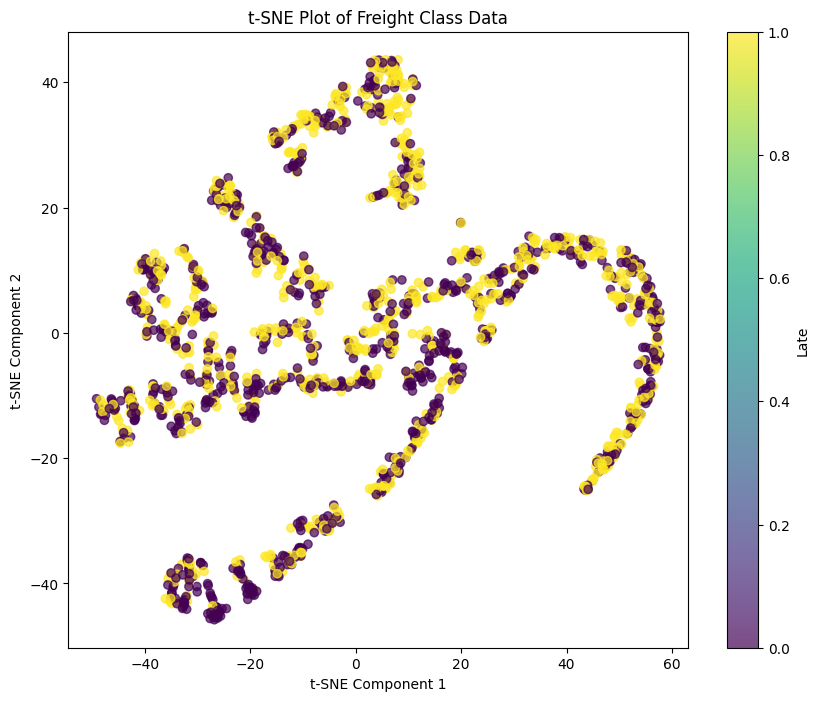

In [71]:

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Select relevant columns for t-SNE
features = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'distance', 'freight_value']
freight_class_cleaned = df_shuffled.dropna(subset=features)

# Extract features and target
X = freight_class_cleaned[features]
y = freight_class_cleaned['late']

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Late')
plt.title('t-SNE Plot of Freight Class Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

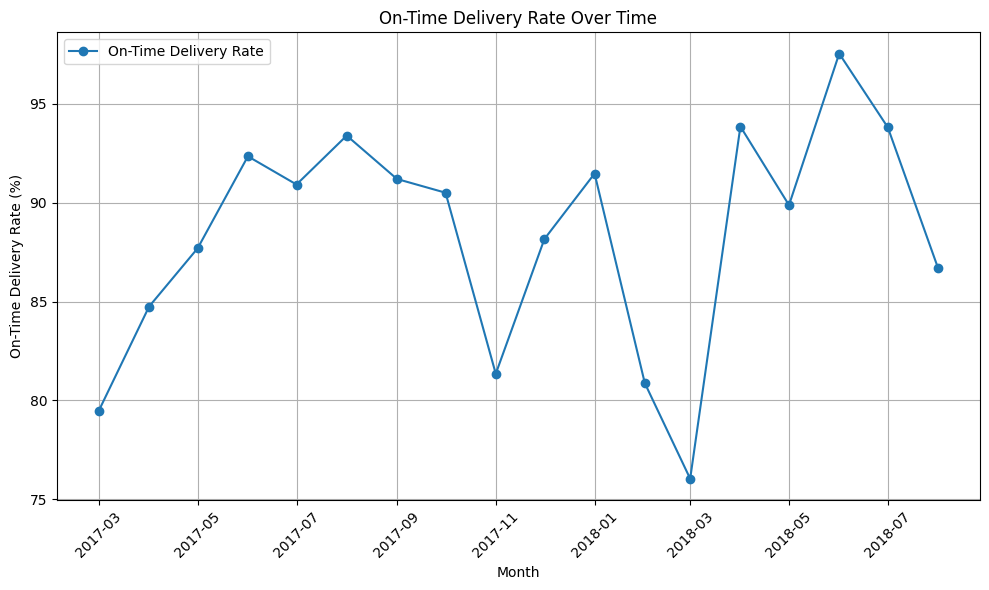

In [79]:
import pandas as pd

json_1 = [
    {
      "month": "2016-10-01 00:00:00",
      "on_time_delivery_rate": "85.1063829787234043",
      "number_late": "120",
      "number_sales": "141"
    },
    {
      "month": "2017-01-01 00:00:00",
      "on_time_delivery_rate": "89.4039735099337748",
      "number_late": "135",
      "number_sales": "151"
    },
    {
      "month": "2017-02-01 00:00:00",
      "on_time_delivery_rate": "87.2807017543859649",
      "number_late": "199",
      "number_sales": "228"
    },
    {
      "month": "2017-03-01 00:00:00",
      "on_time_delivery_rate": "89.0173410404624277",
      "number_late": "154",
      "number_sales": "173"
    },
    {
      "month": "2017-04-01 00:00:00",
      "on_time_delivery_rate": "85.3448275862068966",
      "number_late": "99",
      "number_sales": "116"
    },
    {
      "month": "2017-05-01 00:00:00",
      "on_time_delivery_rate": "82.2580645161290323",
      "number_late": "102",
      "number_sales": "124"
    },
    {
      "month": "2017-06-01 00:00:00",
      "on_time_delivery_rate": "86.8421052631578947",
      "number_late": "66",
      "number_sales": "76"
    },
    {
      "month": "2017-07-01 00:00:00",
      "on_time_delivery_rate": "94.7826086956521739",
      "number_late": "109",
      "number_sales": "115"
    },
    {
      "month": "2017-08-01 00:00:00",
      "on_time_delivery_rate": "88.3720930232558140",
      "number_late": "114",
      "number_sales": "129"
    },
    {
      "month": "2017-09-01 00:00:00",
      "on_time_delivery_rate": "86.6141732283464567",
      "number_late": "110",
      "number_sales": "127"
    },
    {
      "month": "2017-10-01 00:00:00",
      "on_time_delivery_rate": "90.4761904761904762",
      "number_late": "133",
      "number_sales": "147"
    },
    {
      "month": "2017-11-01 00:00:00",
      "on_time_delivery_rate": "81.0526315789473684",
      "number_late": "154",
      "number_sales": "190"
    },
    {
      "month": "2017-12-01 00:00:00",
      "on_time_delivery_rate": "85.5555555555555556",
      "number_late": "77",
      "number_sales": "90"
    },
    {
      "month": "2018-01-01 00:00:00",
      "on_time_delivery_rate": "88.6524822695035461",
      "number_late": "125",
      "number_sales": "141"
    },
    {
      "month": "2018-02-01 00:00:00",
      "on_time_delivery_rate": "80.8333333333333333",
      "number_late": "97",
      "number_sales": "120"
    },
    {
      "month": "2018-03-01 00:00:00",
      "on_time_delivery_rate": "73.4513274336283186",
      "number_late": "83",
      "number_sales": "113"
    },
    {
      "month": "2018-04-01 00:00:00",
      "on_time_delivery_rate": "88.6138613861386139",
      "number_late": "179",
      "number_sales": "202"
    },
    {
      "month": "2018-05-01 00:00:00",
      "on_time_delivery_rate": "88.3720930232558140",
      "number_late": "152",
      "number_sales": "172"
    },
    {
      "month": "2018-06-01 00:00:00",
      "on_time_delivery_rate": "97.3821989528795812",
      "number_late": "186",
      "number_sales": "191"
    },
    {
      "month": "2018-07-01 00:00:00",
      "on_time_delivery_rate": "88.9473684210526316",
      "number_late": "169",
      "number_sales": "190"
    },
    {
      "month": "2018-08-01 00:00:00",
      "on_time_delivery_rate": "87.0967741935483871",
      "number_late": "135",
      "number_sales": "155"
    }
  ]
import matplotlib.pyplot as plt

# Convert JSON to DataFrame
df = pd.DataFrame(json)

# Convert 'month' to datetime and 'on_time_delivery_rate' to float
df['month'] = pd.to_datetime(df['month'])
df['on_time_delivery_rate'] = df['on_time_delivery_rate'].astype(float)

# Plot the first two columns
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['on_time_delivery_rate'], marker='o', label='On-Time Delivery Rate')
plt.xlabel('Month')
plt.ylabel('On-Time Delivery Rate (%)')
plt.title('On-Time Delivery Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

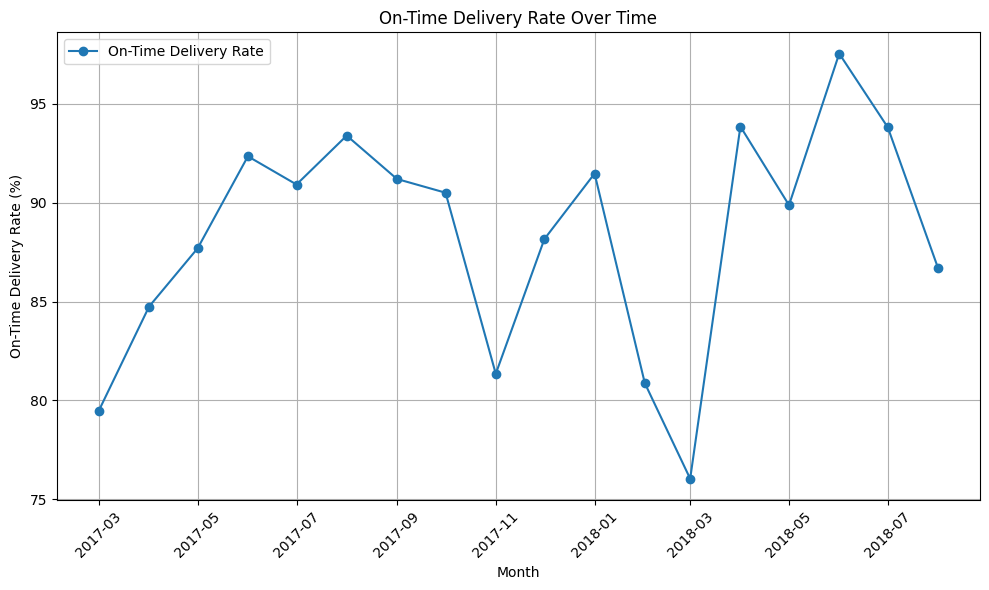

In [80]:
json_2 = [
  {
    "month": "2017-03-01 00:00:00",
    "on_time_delivery_rate": "79.4871794871794872",
    "number_late": "93",
    "number_sales": "117"
  },
  {
    "month": "2017-04-01 00:00:00",
    "on_time_delivery_rate": "84.7457627118644068",
    "number_late": "200",
    "number_sales": "236"
  },
  {
    "month": "2017-05-01 00:00:00",
    "on_time_delivery_rate": "87.6944837340876945",
    "number_late": "620",
    "number_sales": "707"
  },
  {
    "month": "2017-06-01 00:00:00",
    "on_time_delivery_rate": "92.3408845738942826",
    "number_late": "856",
    "number_sales": "927"
  },
  {
    "month": "2017-07-01 00:00:00",
    "on_time_delivery_rate": "90.9159159159159159",
    "number_late": "1211",
    "number_sales": "1332"
  },
  {
    "month": "2017-08-01 00:00:00",
    "on_time_delivery_rate": "93.3873144399460189",
    "number_late": "1384",
    "number_sales": "1482"
  },
  {
    "month": "2017-09-01 00:00:00",
    "on_time_delivery_rate": "91.1949685534591195",
    "number_late": "1450",
    "number_sales": "1590"
  },
  {
    "month": "2017-10-01 00:00:00",
    "on_time_delivery_rate": "90.5007743933918431",
    "number_late": "1753",
    "number_sales": "1937"
  },
  {
    "month": "2017-11-01 00:00:00",
    "on_time_delivery_rate": "81.3473053892215569",
    "number_late": "2717",
    "number_sales": "3340"
  },
  {
    "month": "2017-12-01 00:00:00",
    "on_time_delivery_rate": "88.1568926123381569",
    "number_late": "2315",
    "number_sales": "2626"
  },
  {
    "month": "2018-01-01 00:00:00",
    "on_time_delivery_rate": "91.4704192992533027",
    "number_late": "3185",
    "number_sales": "3482"
  },
  {
    "month": "2018-02-01 00:00:00",
    "on_time_delivery_rate": "80.8754208754208754",
    "number_late": "2402",
    "number_sales": "2970"
  },
  {
    "month": "2018-03-01 00:00:00",
    "on_time_delivery_rate": "76.0436562073669850",
    "number_late": "2787",
    "number_sales": "3665"
  },
  {
    "month": "2018-04-01 00:00:00",
    "on_time_delivery_rate": "93.8475665748393021",
    "number_late": "3066",
    "number_sales": "3267"
  },
  {
    "month": "2018-05-01 00:00:00",
    "on_time_delivery_rate": "89.8741945382019024",
    "number_late": "2929",
    "number_sales": "3259"
  },
  {
    "month": "2018-06-01 00:00:00",
    "on_time_delivery_rate": "97.5334018499486125",
    "number_late": "2847",
    "number_sales": "2919"
  },
  {
    "month": "2018-07-01 00:00:00",
    "on_time_delivery_rate": "93.8032005447735785",
    "number_late": "2755",
    "number_sales": "2937"
  },
  {
    "month": "2018-08-01 00:00:00",
    "on_time_delivery_rate": "86.6926898509581263",
    "number_late": "2443",
    "number_sales": "2818"
  }
]
# Convert JSON to DataFrame
df = pd.DataFrame(json)

# Convert 'month' to datetime and 'on_time_delivery_rate' to float
df['month'] = pd.to_datetime(df['month'])
df['on_time_delivery_rate'] = df['on_time_delivery_rate'].astype(float)

# Plot the first two columns
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['on_time_delivery_rate'], marker='o', label='On-Time Delivery Rate')
plt.xlabel('Month')
plt.ylabel('On-Time Delivery Rate (%)')
plt.title('On-Time Delivery Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

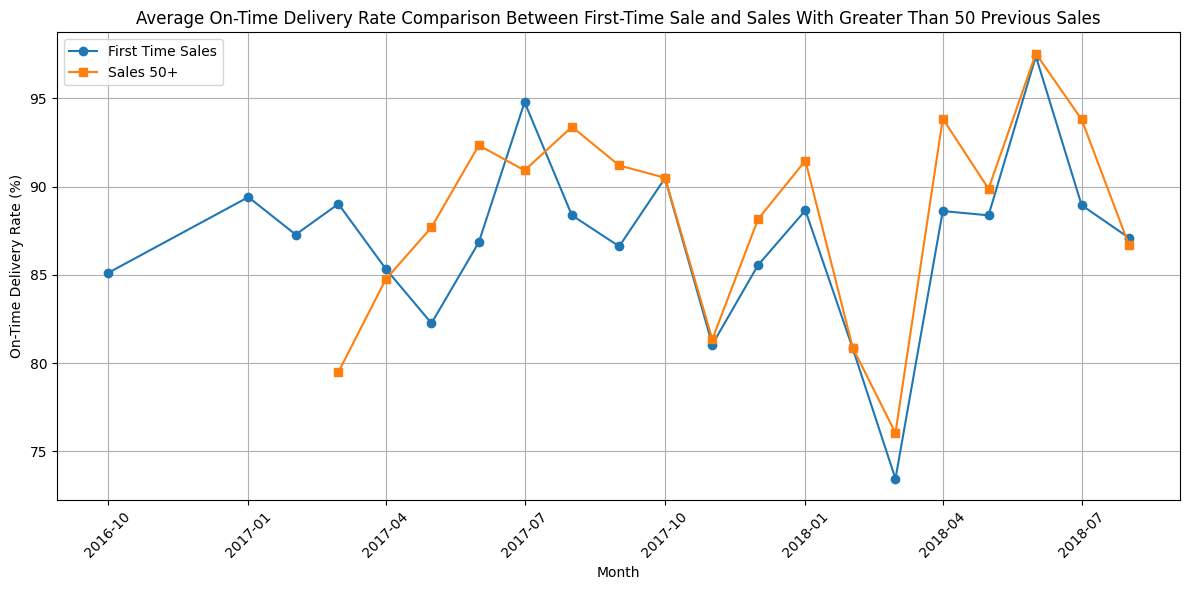

In [83]:

# Convert JSON data to DataFrames
df_json_1 = pd.DataFrame(json_1)
df_json_2 = pd.DataFrame(json_2)

# Convert 'month' to datetime and 'on_time_delivery_rate' to float
df_json_1['month'] = pd.to_datetime(df_json_1['month'])
df_json_1['on_time_delivery_rate'] = df_json_1['on_time_delivery_rate'].astype(float)

df_json_2['month'] = pd.to_datetime(df_json_2['month'])
df_json_2['on_time_delivery_rate'] = df_json_2['on_time_delivery_rate'].astype(float)

# Plot both datasets
plt.figure(figsize=(12, 6))
plt.plot(df_json_1['month'], df_json_1['on_time_delivery_rate'], marker='o', label='First Time Sales')
plt.plot(df_json_2['month'], df_json_2['on_time_delivery_rate'], marker='s', label='Sales 50+')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('On-Time Delivery Rate (%)')
plt.title('Average On-Time Delivery Rate Comparison Between First-Time Sale and Sales With Greater Than 50 Previous Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()